In [1]:
import numpy as np
from numpy import linalg
from matplotlib import cm
from matplotlib import pyplot as plt

x=np.linspace(-2,2,401)
Nx=np.size(x)

amp1=1
x01=0.5
sigmay1=0.6

amp2=1.2
x02=-0.5
sigmay2=0.3

dt=0.01
Nt=1001
tend=dt*(Nt-1)
t=np.linspace(0,tend,Nt)

omega1=1.3
omega2=4.1

y1=amp1*np.exp(-(x-x01)**2/(2*sigmay1**2))
y2=amp2*np.exp(-(x-x02)**2/(2*sigmay2**2))

Y=np.zeros([Nx,Nt],dtype='d')
for tt in range(Nt):
    Y[:,tt]=y1*np.sin(2*np.pi*omega1*t[tt])+y2*np.sin(2*np.pi*omega2*t[tt])

Text(0, 0.5, 'y1,y2')

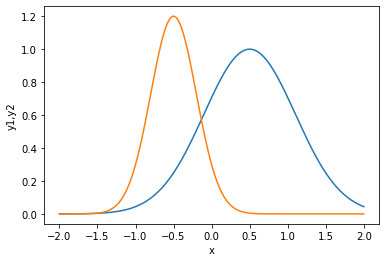

In [2]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel('x',fontsize=10)
plt.ylabel('y1,y2',fontsize=10)

(0.0, 2.0)

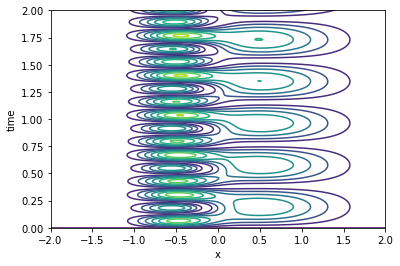

In [3]:
Tgrid,Ygrid=np.meshgrid(t,x)
plt.contour(Ygrid,Tgrid,np.abs(Y))
plt.xlabel('x',fontsize=10)
plt.ylabel('time',fontsize=10)
plt.ylim(0,2)

In [4]:
U,S,VT=linalg.svd(Y,full_matrices=True)
print(np.shape(U))
print(np.shape(S))
print(np.shape(VT))

(401, 401)
(401,)
(1001, 1001)


Text(0, 0.5, 'singlar value')

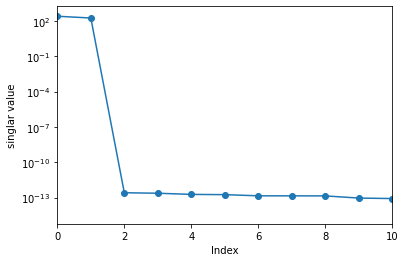

In [5]:
plt.semilogy(S,'-o')
plt.xlim(0,10)
plt.xlabel('Index',fontsize=10)
plt.ylabel('singlar value',fontsize=10)

Text(0.5, 1.0, 'POD mode')

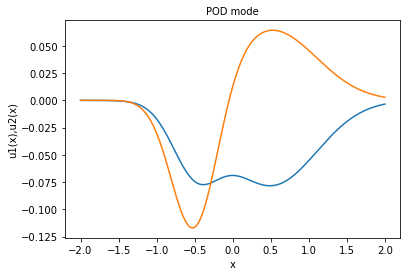

In [6]:
plt.plot(x,U[:,0])
plt.plot(x,U[:,1])
plt.xlabel('x',fontsize=10)
plt.ylabel('u1(x),u2(x)',fontsize=10)
plt.title('POD mode',fontsize=10)

Text(0.5, 1.0, 'POD mode coefficients')

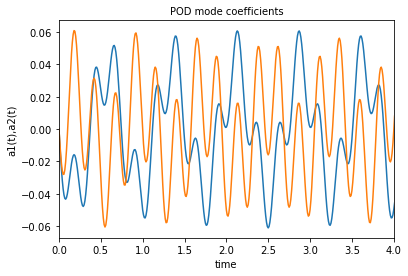

In [7]:
plt.plot(t,VT[0,:])
plt.plot(t,VT[1,:])
plt.xlim(0,4)
plt.xlabel('time',fontsize=10)
plt.ylabel('a1(t),a2(t)',fontsize=10)
plt.title('POD mode coefficients',fontsize=10)

In [8]:
Y2=np.dot(np.dot(U[:,0:2],np.diag(S[0:2])),VT[0:2,:])

In [9]:
np.diag(S[0:2])

array([[246.88068218,   0.        ],
       [  0.        , 174.63734919]])

In [10]:
np.linalg.norm(Y-Y2)/np.linalg.norm(Y)

1.1188600877248644e-15